##Install necessary libraries

In [ ]:
!pip install ultralytics==8.3.19
!pip install supervision[assets]==0.24.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import os
import numpy as np
import supervision as sv
import ultralytics
from ultralytics import YOLO
from IPython import display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Install YOLOv8

In [ ]:
display.clear_output()

ultralytics.checks()

Ultralytics 8.3.19 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


## Install Roboflow Supervision

In [ ]:
display.clear_output()

print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.24.0


In [ ]:
HOME = os.getcwd()
print(HOME)

/content


## Download example video

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TCXHKBRSqdsgn9QySEdlT5OLYNqjMwVL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TCXHKBRSqdsgn9QySEdlT5OLYNqjMwVL" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt

/content
--2025-02-15 08:01:45--  https://docs.google.com/uc?export=download&confirm=&id=1TCXHKBRSqdsgn9QySEdlT5OLYNqjMwVL
Resolving docs.google.com (docs.google.com)... 108.177.127.101, 108.177.127.113, 108.177.127.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1TCXHKBRSqdsgn9QySEdlT5OLYNqjMwVL&export=download [following]
--2025-02-15 08:01:45--  https://drive.usercontent.google.com/download?id=1TCXHKBRSqdsgn9QySEdlT5OLYNqjMwVL&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.218.132, 2a00:1450:4013:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.218.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35345757 (34M) [video/mp4]
Saving to: ‘vehicle-counting.mp4’

vehicle-counting.mp 100%[===================>]  33.71M

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/vehicle-counting.mp4"

## Load pre-trained YOLOv8 model

In [ ]:
model = YOLO("yolov10x.pt")

100%|██████████| 61.4M/61.4M [00:00<00:00, 78.7MB/s]


## Predict and annotate single frame

In [ ]:
CLASS_NAMES_DICT = model.model.names

SELECTED_CLASS_NAMES = ['car', 'motorcycle', 'bus', 'truck']

SELECTED_CLASS_IDS = [
    {value: key for key, value in CLASS_NAMES_DICT.items()}[class_name]
    for class_name
    in SELECTED_CLASS_NAMES
]

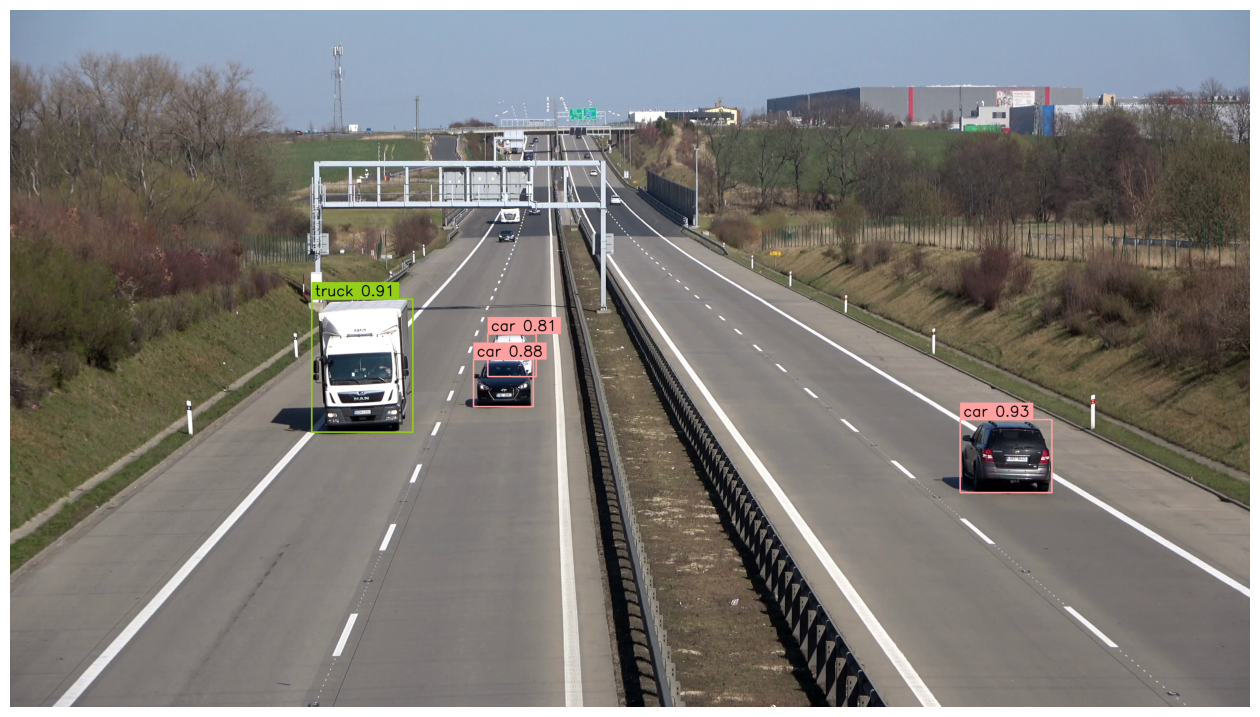

In [ ]:
# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator and LabelAnnotator
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame, verbose=False)[0]

# convert to Detections
detections = sv.Detections.from_ultralytics(results)
# only consider class id from selected_classes define above
detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# annotate and display frame
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
print("Selected Class IDs:", SELECTED_CLASS_IDS)
print("Detected Class IDs Before Filtering:", detections.class_id)
detections = detections[np.isin(detections.class_id.astype(int), np.array(SELECTED_CLASS_IDS, dtype=int))]
print("Detected Class IDs After Filtering:", detections.class_id)

Selected Class IDs: [2, 3, 5, 7]
Detected Class IDs Before Filtering: [2 7 2 2]
Detected Class IDs After Filtering: [2 7 2 2]


## Predict and annotate whole video

In [ ]:
LINE_START = sv.Point(0 + 50, 1500)
LINE_END = sv.Point(3840 - 50, 1500)

TARGET_VIDEO_PATH = f"{HOME}/result_BYTETracker.mp4"

In [ ]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=3840, height=2160, fps=25, total_frames=538)

In [ ]:
# create BYTETracker instance
byte_tracker = sv.ByteTrack(
    track_activation_threshold=0.25,
    lost_track_buffer=30,
    minimum_matching_threshold=0.8,
    frame_rate=30,
    minimum_consecutive_frames=3)

byte_tracker.reset()

# create VideoInfo instance
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# create LineZone instance, it is previously called LineCounter class
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

# create instance of BoxAnnotator, LabelAnnotator, and TraceAnnotator
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)

# create LineZoneAnnotator instance, it is previously called LineCounterAnnotator class
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)

# define call back function to be used in video processing
def callback(frame: np.ndarray, index: int) -> np.ndarray:
    # model prediction on single frame and conversion to supervision Detections
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    # only consider class id from selected_classes define above
    detections = detections[np.isin(detections.class_id.astype(int), np.array(SELECTED_CLASS_IDS, dtype=int))]
    # tracking detections
    detections = byte_tracker.update_with_detections(detections)
    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]
    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame, detections=detections)
    annotated_frame = box_annotator.annotate(
        scene=annotated_frame, detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame, detections=detections, labels=labels)

    # update line counter
    line_zone.trigger(detections)

    # return frame with box and line annotated result
    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# process the whole video
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)

##Install necessary libraries

In [ ]:
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 83.4 MB/s eta 0:00:00


In [ ]:
from deep_sort_realtime.deepsort_tracker import DeepSort
import numpy as np
import supervision as sv

TARGET_VIDEO_PATH = f"{HOME}/result_DeepSORT.mp4"

# Initialize Deep SORT Tracker
deep_sort_tracker = DeepSort(max_age=30, n_init=3, max_cosine_distance=0.2)

# Initialize annotators (ensure all required annotators are defined)
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)
line_zone_annotator = sv.LineZoneAnnotator(thickness=4, text_thickness=4, text_scale=2)
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    # Run YOLO detection on the frame.
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    # Filter by selected classes.
    detections = detections[np.isin(detections.class_id, SELECTED_CLASS_IDS)]

    # Convert detections to Deep SORT format.
    ds_detections = []
    for bbox, conf, class_id in zip(detections.xyxy, detections.confidence, detections.class_id):
        class_name = CLASS_NAMES_DICT.get(class_id, "Unknown")
        left, top, xmax, ymax = bbox
        width, height = xmax - left, ymax - top
        ds_detections.append(([left, top, width, height], float(conf), class_name))

    # Update Deep SORT tracker.
    tracks = deep_sort_tracker.update_tracks(ds_detections, frame=frame)

    # Convert Deep SORT tracks back to a Supervision Detections object.
    tracked_bboxes = []
    tracked_confidences = []
    tracked_class_ids = []
    tracked_ids = []

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        bbox = track.to_ltrb()
        conf = getattr(track, 'det_conf', 1.0)

        # Retrieve the class name from the track.
        class_name = track.get_det_class() or "Unknown"

        # Map class name back to class ID.
        class_id = {value: key for key, value in CLASS_NAMES_DICT.items()}.get(class_name, None)
        if class_id is None:
            class_id = 0  # Default class ID

        tracked_bboxes.append(bbox)
        tracked_confidences.append(conf)
        tracked_class_ids.append(class_id)
        tracked_ids.append(track_id)

    # Build the detections object.
    if len(tracked_bboxes) > 0:
        tracked_detections = sv.Detections(
            xyxy=np.array(tracked_bboxes, dtype=np.float32).reshape(-1, 4),
            confidence=np.array(tracked_confidences, dtype=np.float32),
            class_id=np.array(tracked_class_ids, dtype=np.int32),
            tracker_id=np.array(tracked_ids, dtype=np.int32)
        )
    else:
        tracked_detections = sv.Detections(
            xyxy=np.zeros((0, 4), dtype=np.float32),
            confidence=np.array([], dtype=np.float32),
            class_id=np.array([], dtype=np.int32),
            tracker_id=np.array([], dtype=np.int32)
        )

    # Generate labels for each tracked detection.
    labels = [
        f"#{tracker_id} {CLASS_NAMES_DICT.get(class_id, 'Unknown')}"
        for tracker_id, class_id in zip(tracked_ids, tracked_class_ids)
    ]

    # Annotate the frame.
    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=tracked_detections)
    annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=tracked_detections)
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=tracked_detections, labels=labels)

    # Update the line zone counter.
    line_zone.trigger(tracked_detections)

    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# Process the video with Deep SORT tracking.
sv.process_video(
    source_path=SOURCE_VIDEO_PATH,
    target_path=TARGET_VIDEO_PATH,
    callback=callback
)

# Evaluation

# Footballer tracking using Mean Shift (single object tracking)

In [ ]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 68.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 87.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 88.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 32.4MB/s]


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

model = YOLO("yolov8x.pt")

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
cap = cv2.VideoCapture(SOURCE_VIDEO_PATH)
if not cap.isOpened():
    print("Can't open the video")
    exit()

In [ ]:
ret, first_frame = cap.read()
if not ret:
    print("Can't read the first_frame")
    cap.release()
    exit()

results = model(first_frame)

boxes = results[0].boxes.xyxy.cpu().numpy()
classes = results[0].boxes.cls.cpu().numpy()
scores = results[0].boxes.conf.cpu().numpy()

In [ ]:
# create frame generator
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator and LabelAnnotator
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame, verbose=False)[0]

# convert to Detections
detections = sv.Detections.from_ultralytics(results)

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

# annotate and display frame
annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
import matplotlib.pyplot as plt

target_labels = ["person", "sports ball"]
trackers = []

for box, cls, conf in zip(boxes, classes, scores):
    label = CLASS_NAMES_DICT[int(cls)]
    if label in target_labels and conf > 0.3:
        x1, y1, x2, y2 = box.astype(int)
        w = x2 - x1
        h = y2 - y1
        if w <= 0 or h <= 0:
            continue

        track_window = (x1, y1, w, h)
        roi = first_frame[y1:y1+h, x1:x1+w]
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv_roi, np.array((0, 60, 32)), np.array((180, 255, 255)))
        roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
        cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

        trackers.append({
            "label": label,
            "track_window": track_window,
            "roi_hist": roi_hist
        })

if len(trackers) == 0:
    print("Can't detect any target object")
    cap.release()
    exit()

for i, tracker in enumerate(trackers):
    x, y, w, h = tracker["track_window"]
    roi = first_frame[y:y+h, x:x+w]

    plt.figure(figsize=(4, 4))
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    plt.imshow(hsv_roi)
    plt.title(f"ROI {i}: {tracker['label']}")
    plt.axis("off")
    plt.show()

In [ ]:
tracker_boxes = []
tracker_confidences = []
tracker_class_ids = []
tracker_labels = []

for tracker in trackers:
    x, y, w, h = tracker["track_window"]
    # Convert (x, y, w, h) to (x1, y1, x2, y2)
    tracker_boxes.append([x, y, x + w, y + h])
    tracker_confidences.append(1.0)
    tracker_class_ids.append(0)
    tracker_labels.append(tracker["label"])

# Convert lists to numpy arrays
tracker_boxes = np.array(tracker_boxes)
tracker_confidences = np.array(tracker_confidences)
tracker_class_ids = np.array(tracker_class_ids)

# Create a supervision Detections object using our trackers information.
detections = sv.Detections(
    xyxy=tracker_boxes,
    confidence=tracker_confidences,
    class_id=tracker_class_ids
)

# Create annotators (similar to your sample code)
box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)

# Copy the original frame to annotate on it.
annotated_frame = first_frame.copy()

# Annotate with bounding boxes and custom labels from trackers.
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections
)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=tracker_labels
)

sv.plot_image(annotated_frame, (16, 16))

In [ ]:
TARGET_VIDEO_PATH = f"{HOME}/result_MeanShift.mp4"

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    # Convert frame to HSV.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Update each tracker using Mean Shift.
    for tracker in trackers:
        dst = cv2.calcBackProject([hsv], [0], tracker["roi_hist"], [0, 180], 1)
        # cv2.meanShift returns (number_of_iterations, new_track_window)
        _, new_track_window = cv2.meanShift(dst, tracker["track_window"], term_crit)
        tracker["track_window"] = new_track_window

    tracker_boxes = []
    tracker_confidences = []
    tracker_class_ids = []
    tracker_ids = []
    tracker_labels = []

    for i, tracker in enumerate(trackers):
        x, y, w, h = tracker["track_window"]
        tracker_boxes.append([x, y, x + w, y + h])
        tracker_confidences.append(1.0)
        label = tracker["label"]

        if label == "person":
            cid = 0
        elif label == "sports ball":
            cid = 1
        else:
            cid = -1  # Unknown class

        tracker_class_ids.append(cid)
        tracker_ids.append(i)
        tracker_labels.append(label)

    detections = sv.Detections(
        xyxy=np.array(tracker_boxes, dtype=np.float32),
        confidence=np.array(tracker_confidences, dtype=np.float32),
        class_id=np.array(tracker_class_ids, dtype=np.int32),
        tracker_id=np.array(tracker_ids, dtype=np.int32)
    )

    box_annotator = sv.BoxAnnotator(thickness=4)
    label_annotator = sv.LabelAnnotator(text_thickness=2, text_scale=1.5, text_color=sv.Color.BLACK)

    labels = [f"#{tid} {lbl}" for tid, lbl in zip(tracker_ids, tracker_labels)]

    annotated_frame = frame.copy()
    annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
    annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

    return annotated_frame

sv.process_video(
    source_path=SOURCE_VIDEO_PATH,
    target_path=TARGET_VIDEO_PATH,
    callback=callback
)

print("Video is saved to:", TARGET_VIDEO_PATH)